Epoch 1: train loss 0.1387, test loss 0.1645, train acc 0.9627, test acc 0.9543
Epoch 2: train loss 0.1105, test loss 0.1265, train acc 0.9684, test acc 0.9623
Epoch 3: train loss 0.0864, test loss 0.1170, train acc 0.9763, test acc 0.9678
Epoch 4: train loss 0.0944, test loss 0.1259, train acc 0.9692, test acc 0.9618
Epoch 5: train loss 0.0840, test loss 0.0957, train acc 0.9772, test acc 0.9722
Epoch 6: train loss 0.0736, test loss 0.0928, train acc 0.9798, test acc 0.9740
Epoch 7: train loss 0.0894, test loss 0.1103, train acc 0.9741, test acc 0.9678
Epoch 8: train loss 0.0779, test loss 0.1034, train acc 0.9757, test acc 0.9702
Epoch 9: train loss 0.0679, test loss 0.0924, train acc 0.9804, test acc 0.9712
Epoch 10: train loss 0.0594, test loss 0.0908, train acc 0.9830, test acc 0.9755
Epoch 11: train loss 0.0664, test loss 0.0809, train acc 0.9811, test acc 0.9735
Epoch 12: train loss 0.0576, test loss 0.0719, train acc 0.9832, test acc 0.9788
Epoch 13: train loss 0.0681, test los

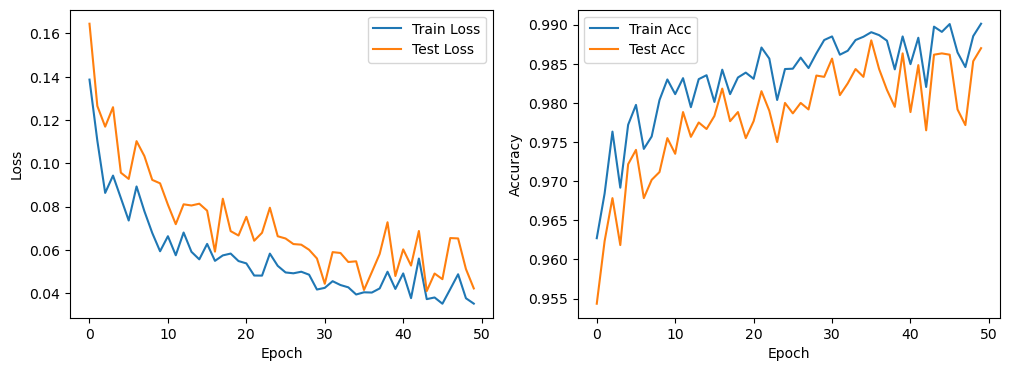

In [34]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
softmax = lambda z: np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
cross_entropy_loss = lambda y, y_pred: -np.mean(np.sum(y * np.log(y_pred), axis=1))
accuracy = lambda y_true, y_pred: np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))
df= pd.read_csv('Classification_train.csv')
df.iloc[:, 1:]/=255

def logreg(batch_size, alpha, epochs, df):
    train_loss, test_loss, train_acc, test_acc = [], [], [], []
    b=0
    w = np.zeros((784,10))
    for epoch in range(epochs):
        x_train, y_train, x_test, y_test = df.sample(frac=1).pipe(lambda df: (df.iloc[:24000,1:].values, df.iloc[:24000, 0].values, df.iloc[24000:, 1:].values, df.iloc[24000:, 0].values))
        y_train, y_test = pd.get_dummies(y_train, dtype = int).values, pd.get_dummies(y_test, dtype = int).values
        for i in range(0, x_train.shape[0], batch_size):
            z = np.dot(x_train[i:i+batch_size], w) + b
            w = w - alpha*(np.dot(x_train[i:i+batch_size].T, softmax(z) - y_train[i:i+batch_size]))
            b = b - alpha*(np.sum(softmax(z) - y_train[i:i+batch_size], axis =0, keepdims = True))
        y_pred_train = softmax(np.dot(x_train, w) + b)
        y_pred_test = softmax(np.dot(x_test, w) + b)
        train_loss.append(cross_entropy_loss(y_train, y_pred_train))
        test_loss.append(cross_entropy_loss(y_test, y_pred_test))
        train_acc.append(accuracy(y_train, y_pred_train))
        test_acc.append(accuracy(y_test, y_pred_test))
        print(f"Epoch {epoch+1}: train loss {train_loss[-1]:.4f}, test loss {test_loss[-1]:.4f}, train acc {train_acc[-1]:.4f}, test acc {test_acc[-1]:.4f}")
    return train_loss, test_loss, train_acc, test_acc, w,b
        
train_loss, test_loss, train_acc, test_acc, w, b = logreg(100, 0.05, 50, df)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss", )
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Train Acc")
plt.plot(test_acc, label="Test Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
